# Simple classification example: the iris dataset

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
# import some data to play with
# columns: Sepal Length, Sepal Width, Petal Length and Petal Width
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
# just to create a nice table
df = pd.DataFrame({"Sepal Length (cm)": X[:,0], "Sepal Width (cm)": X[:,1], 
                   'Petal Length (cm)': X[:,2], 'Petal Width (cm)': X[:,3], 
                   'category': y})
df.head()

Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   category  
0         0  
1         0  
2         0  
3         0  
4         0

In [5]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [6]:
# split data into training and test data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Text(0, 0.5, 'Petal width')

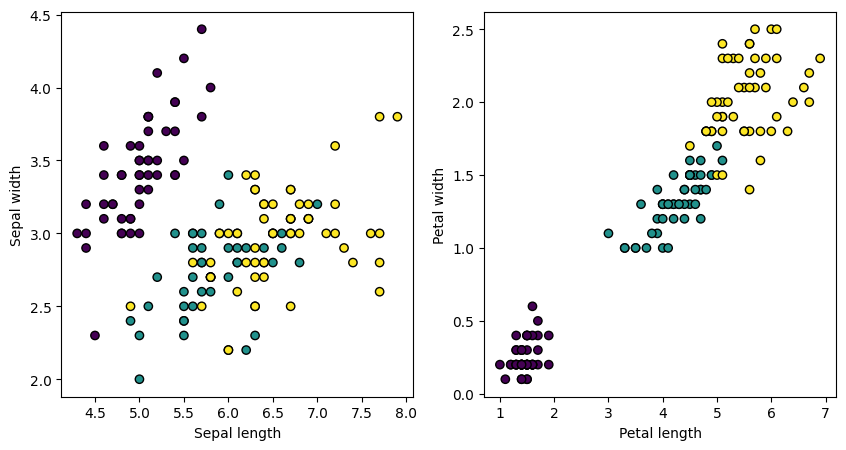

In [7]:
# plot with color code
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=y, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

## Softmax regression

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', penalty='none')
log_reg.fit(x_train, y_train);

## k-nearest neighbor

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn_neigh = KNeighborsClassifier(n_neighbors=5)
kn_neigh.fit(x_train, y_train);

## Fisher linear discriminant

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
fisher_ld = LinearDiscriminantAnalysis()
fisher_ld.fit(x_train, y_train);

## Classification accuracy

In [11]:
for clf in [log_reg, kn_neigh, fisher_ld]:
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(type(clf).__name__)
    print(f"accuracy: {acc:0.2f}")
    
    # confusion matrix: columns: true class, row: predicted class
    print(confusion_matrix(y_test, y_pred),"\n")

LogisticRegression
accuracy: 0.96
[[29  0  0]
 [ 0 23  0]
 [ 0  3 20]] 

KNeighborsClassifier
accuracy: 0.95
[[29  0  0]
 [ 0 23  0]
 [ 0  4 19]] 

LinearDiscriminantAnalysis
accuracy: 0.99
[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]] 



In [12]:
y_pred = log_reg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.88      1.00      0.94        23
           2       1.00      0.87      0.93        23

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

